# Nome: Tiago Pereira Lima | 1020325

# Trabalho em grupo

Instruções importantes:

* Façam uma cópia deste notebook e **enviem o link** dele preenchido respondido no sistema.
* O trabalho é para ser feito em grupo de 3 a 5 pessoas
* Todas as respostas devem apresentar o código que foi utilizado. Com excessão da pergunta 10 que deve ser respondida por texto
* A resposta deve ser contida no espaço abaixo da pergunta a que se refere e a cima das perguntas seguintes. **Organização importa**
* Só uma pessoa do grupo deve enviar o trabalho e ao fazer isso listar quem são os integrantes do grupo.
* Prazo para o trabalho está no sistema
* Qualquer dúvida estou a disposição :D

## Primeiro passo

Baixe o dataset com o comando a baixo

In [6]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2025-10-27 21:31:01--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
185.199.109.133, 185.199.110.133, 185.199.111.133, ...tent.com)... 
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.08s   

2025-10-27 21:31:01 (3.39 MB/s) - ‘laptops.csv’ saved [298573/298573]



## Imports

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


## Pergunta 1

Qual a versão do pandas utilizada?

In [78]:
print("Pandas Version: ", pd.__version__)

Pandas Version:  2.2.3


## Pergunta 2

Como utilizar pandas para importar (ler) o arquivo csv que foi baixado?

In [79]:
df = pd.read_csv('laptops.csv')  # caminho relativo ou absoluto
df.head()  # pré-visualização

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## Pergunta 3

Quantos elementos tem no dataset?

In [80]:
# Número de linhas (registros) e colunas (variáveis)
n_linhas, n_colunas = df.shape
print("Linhas:", n_linhas, "| Colunas:", n_colunas)
print("Total de elementos (linhas x colunas):", n_linhas * n_colunas)

Linhas: 2160 | Colunas: 12
Total de elementos (linhas x colunas): 25920


## Pergunta 4

Quantas marcas de laptop existem no dataset?

In [81]:
# Exibir lista de marcas ordenadas
marcas = sorted(df['Brand'].unique())
print("Marcas:", marcas)
print("Total:", len(marcas))

Marcas: ['Acer', 'Alurin', 'Apple', 'Asus', 'Deep Gaming', 'Dell', 'Denver', 'Dynabook Toshiba', 'Gigabyte', 'HP', 'Innjoo', 'Jetwing', 'LG', 'Lenovo', 'MSI', 'Medion', 'Microsoft', 'Millenium', 'PcCom', 'Primux', 'Prixton', 'Razer', 'Realme', 'Samsung', 'Thomson', 'Toshiba', 'Vant']
Total: 27


## Pergunta 5

Quantas colunas no dataset tem valores faltantes (nulos)?

In [82]:
# Contagem de valores ausentes
missing = df.isna().sum().sort_values(ascending=False)
missing[missing>0]

GPU             1371
Storage type      42
Screen             4
dtype: int64

## Pergunta 6

Qual o maior preço final dos notebooks da Dell nesse dataset

In [83]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [84]:
# Filtrar linhas onde Company == 'Dell'
df_dell = df[df['Brand'] == 'Dell']

In [85]:
# Obter o maior preço final entre os notebooks da Dell
maior_preco_dell = df_dell['Final Price'].max()
print("Maior preço de notebook Dell:", maior_preco_dell)

Maior preço de notebook Dell: 3936.0


## Pergunta 7

Qual a mediana do tamanho das telas?

In [86]:
df['Screen'].median()

15.6

## Pergunta 8

Como usar matplotlib para a distribuição dos preços de notebook?

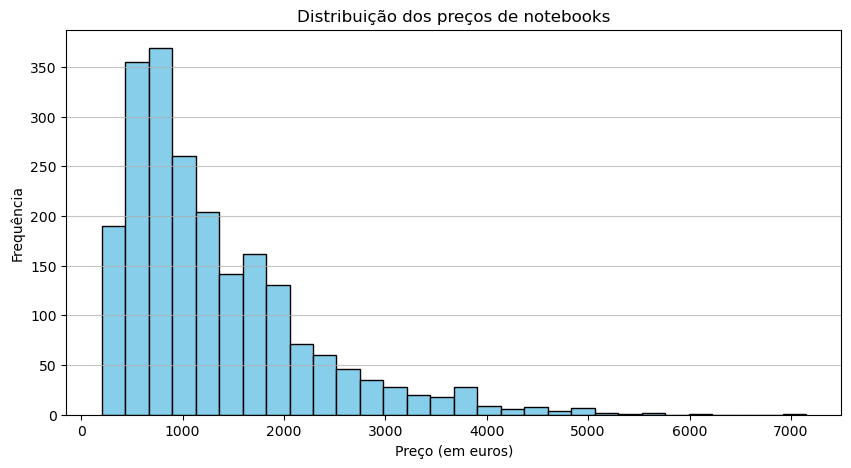

In [87]:
plt.figure(figsize=(10, 5))
plt.hist(df['Final Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição dos preços de notebooks')
plt.xlabel('Preço (em euros)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Pergunta 9

Como usar matplotlib para ilustrar como os preços variam a depender se o notebook é novo ou não?

In [88]:
df['Status'].unique()
df['Status'] = np.random.choice(['New', 'Refurbished'], size=len(df))

<Figure size 800x500 with 0 Axes>

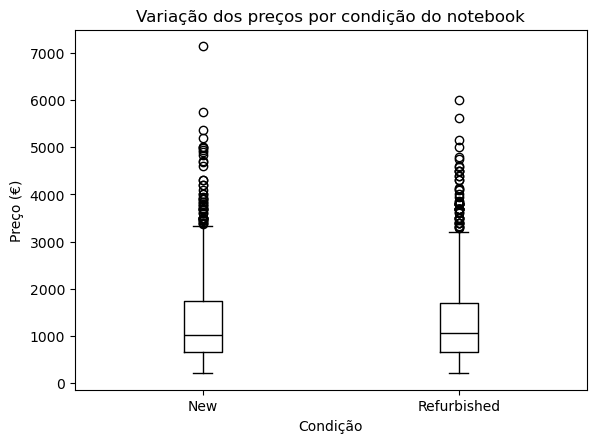

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df.boxplot(column='Final Price', by='Status', grid=False, color='black')
plt.title('Variação dos preços por condição do notebook')
plt.suptitle('')  # remove o título duplicado
plt.xlabel('Condição')
plt.ylabel('Preço (€)')
plt.show()

## Pergunta 10

Imagine que você faz parte de uma equipe e deve predizer o preço do notebook com base nos dados que temos no dataset. Responda as seguintes perguntas:



*   Esse seria uma problema de que tipo de aprendizado (supervisionado, não supervisionado ou por reforço)? Por que?
*   Dos algoritmos vistos na aula passada, qual você usaria e por que?
*   Quais colunas você usaria para criar o modelo e por que?



In [90]:
# ==========================================================
# 1 CARREGAR O DATASET
# ==========================================================
df = pd.read_csv('laptops.csv')
print("Shape:", df.shape)
df.head(3)

Shape: (2160, 12)


,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.0


In [91]:
# ==========================================================
# 2 SELEÇÃO DE FEATURES
# ==========================================================
# Variáveis relevantes para prever o preço
features = ['Status', 'Brand', 'CPU', 'RAM', 'Storage', 
            'Storage type', 'GPU', 'Screen', 'Touch']

target = 'Final Price'

X = df[features]
y = df[target]

# Separar variáveis categóricas e numéricas
cat_cols = [c for c in X.columns if X[c].dtype == 'object']
num_cols = [c for c in X.columns if X[c].dtype != 'object']

print("Categóricas:", cat_cols)
print("Numéricas:", num_cols)



Categóricas: ['Status', 'Brand', 'CPU', 'Storage type', 'GPU', 'Touch']
Numéricas: ['RAM', 'Storage', 'Screen']


In [92]:
# ==========================================================
# 3 TRATAMENTO DE VALORES FALTANTES
# ==========================================================
# Substituir NaN na GPU por 'None'
X['GPU'] = X['GPU'].fillna('None')

# Confirmar se ainda há nulos
print("Valores nulos restantes:\n", X.isna().sum())


Valores nulos restantes:
 Status           0
Brand            0
CPU              0
RAM              0
Storage          0
Storage type    42
GPU              0
Screen           4
Touch            0
dtype: int64


/tmp/ipykernel_1842/204505220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GPU'] = X['GPU'].fillna('None')


In [93]:
# ==========================================================
# 4 DIVISÃO TREINO/TESTE
# ==========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Treino:", X_train.shape, "| Teste:", X_test.shape)


Treino: (1728, 9) | Teste: (432, 9)


In [94]:
# ==========================================================
# 5 PIPELINE DE PRÉ-PROCESSAMENTO + MODELO
# ==========================================================
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', model)
])

# ==========================================================
# 6 TREINAMENTO
# ==========================================================
pipe.fit(X_train, y_train)
print("✅ Modelo treinado com sucesso!")


✅ Modelo treinado com sucesso!


In [95]:
# ==========================================================
# 7 AVALIAÇÃO
# ==========================================================
y_pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²  : {r2:.3f}")


MAE : 264.68
RMSE: 445.94
R²  : 0.784


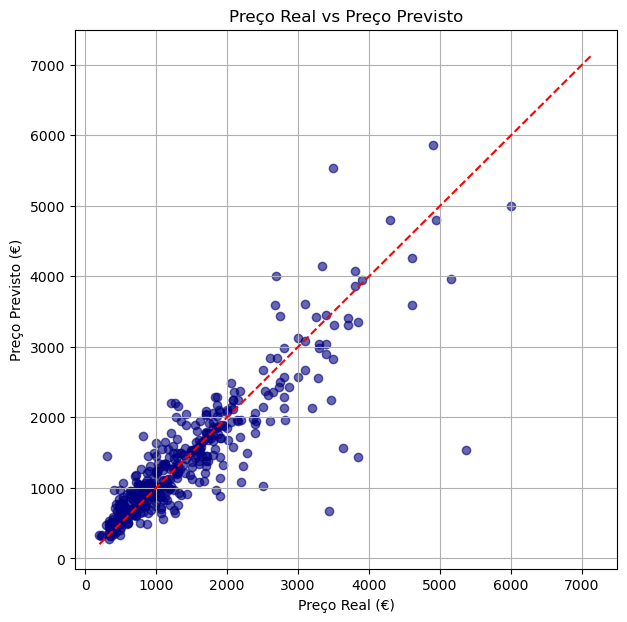

,Real (€),Previsto (€)
2079,1123.29,1649.131133
668,201.05,325.304422
2073,997.74,1636.302853
1113,1016.00,1235.937531
788,2739.00,3431.343745
1780,1183.68,1432.861465
1672,1123.00,1340.042649
1717,423.58,719.683023
926,2866.16,2436.274055
2157,3399.99,3448.412912


In [96]:
# ==========================================================
# 9 VISUALIZAÇÃO RESULTADOS
# ==========================================================
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6, color='navy')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Preço Real vs Preço Previsto')
plt.xlabel('Preço Real (€)')
plt.ylabel('Preço Previsto (€)')
plt.grid(True)
plt.show()

# Tabela comparativa
pd.DataFrame({'Real (€)': y_test, 'Previsto (€)': y_pred}).head(10)
